<h1>Preprocess ICD9 codes</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read in the ICD9 code dataset
# These are the dictionaries that store info regarding the code and what it represents
diagnoses_dict = pd.read_csv('MIMIC_Data/D_ICD_DIAGNOSES.csv')
procedures_dict = pd.read_csv('MIMIC_Data/D_ICD_PROCEDURES.csv')
notes = pd.read_csv('MIMIC_Data/NOTEEVENTS.csv')
patient_codes = pd.read_csv('MIMIC_Data/DIAGNOSES_ICD.csv')

print(diagnoses_dict.describe())
print(procedures_dict.describe())
print(patient_codes.describe())


/Users/aiswaryasankar/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             ROW_ID
count  14567.000000
mean    7284.000000
std     4205.275021
min        1.000000
25%     3642.500000
50%     7284.000000
75%    10925.500000
max    14567.000000
            ROW_ID    ICD9_CODE
count  3882.000000  3882.000000
mean   1941.500000  5466.241628
std    1120.781201  3183.187486
min       1.000000     1.000000
25%     971.250000  2837.000000
50%    1941.500000  5672.500000
75%    2911.750000  8382.750000
max    3882.000000  9999.000000
              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM
count  651047.000000  651047.000000  651047.000000  651000.000000
mean   325524.000000   38971.159758  150017.744819       7.913836
std    187941.224689   29372.198841   28878.068648       6.072633
min         1.000000       2.000000  100001.000000       1.000000
25%    162762.500000   14562.500000  125028.000000       3.000000
50%    325524.000000   28671.000000  150140.000000       6.000000
75%    488285.500000   63715.000000  174978.000000      11.000000
max 

In [2]:
# Print out the columns for each database

print('Columns diagnoses_dict')
print(diagnoses_dict.columns)

print('\nColumns procedures_dict')
print(procedures_dict.columns)

print('\nColumns patient_codes')
print(patient_codes.columns)

print('\nColumns notes')
print(notes.columns)

Columns diagnoses_dict
Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object')

Columns procedures_dict
Index(['ROW_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE'], dtype='object')

Columns patient_codes
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')

Columns notes
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')


In [3]:
print(notes.head())

   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Da

<h1>10 Most Common ICD9 codes</h1>

In [47]:
# Determine which are the top 10 used codes 
# Create a histogram of the ICD9_Codes used in patient_codes and extract the Short_title from the dict

extra = [(code, count) for count, code in 
          zip(patient_codes['ICD9_CODE'].value_counts(), patient_codes['ICD9_CODE'].value_counts().index.tolist())][:10]
top10_ICD9_codes = [code for code in patient_codes['ICD9_CODE'].value_counts().index.tolist()][:10]
top10_ICD9_counts = [count for count in patient_codes['ICD9_CODE'].value_counts()][:10]

# Given the ICD9_CODE, lookup the code in the dictionary to figure out the name
# Get another column value from dataframe if a column is a certain value
ICD9_names = [diagnoses_dict.loc[diagnoses_dict['ICD9_CODE'] == val, 'SHORT_TITLE'].item() for val in ICD9_codes]

num_patients = 46520 # total number of patients in the dataset
print('Top ICD9 codes \t\t\t\t Percent of Patients with code\n')
for code, count, name in zip(top10_ICD9_codes, top10_ICD9_counts, ICD9_names):
    print('%s: %s\t\t %f' %(code, name, count / num_patients))


Top ICD9 codes 				 Percent of Patients with code

4019: Hypertension NOS		 0.445034
4280: CHF NOS		 0.281836
42731: Atrial fibrillation		 0.277107
41401: Crnry athrscl natve vssl		 0.267175
5849: Acute kidney failure NOS		 0.196023
25000: DMII wo cmp nt st uncntr		 0.194712
2724: Hyperlipidemia NEC/NOS		 0.186801
51881: Acute respiratry failure		 0.161156
5990: Urin tract infection NOS		 0.140907
53081: Esophageal reflux		 0.135985


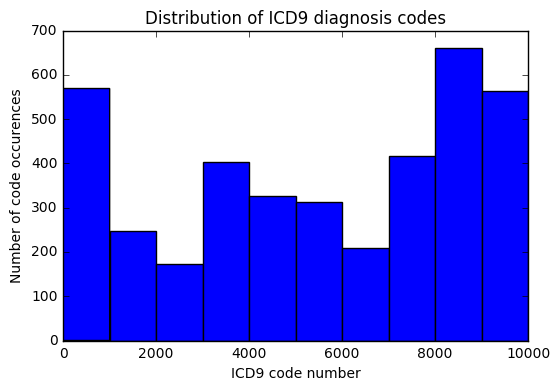

In [5]:
# Display the distribution of ICD9 diagnosis codes

plt.hist(procedures_dict['ICD9_CODE'])
plt.xlabel('ICD9 code number')
plt.ylabel('Number of code occurences')
plt.title('Distribution of ICD9 diagnosis codes')
plt.show()

<h1>Explore Medical Note database</h1>

In [6]:
# Example of one of the medical notes

print(notes.loc[2]['TEXT'])

Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]


Service: CARDIOTHORACIC

Allergies:
Amlodipine

Attending:[**Last Name (NamePattern1) 1561**]
Chief Complaint:
81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]
s/p perc trach [**5-13**]

Major Surgical or Invasive Procedure:
bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]
s/p trachealplasty [**5-5**]
percutaneous tracheostomy [**5-13**] after failed extubation
down size trach on [**5-25**] to size 6 cuffless


History of Present Illness:
This 81 year old woman has a history of COPD. Over the past five

years she has had progressive difficulties with her breathing.
In
[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure
due
to a COPD exacerbation. Due to persistent hypoxemia, she
required
intubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked

narrowing of the airways on expiration consistent with
tracheomalacia.
She subsequently un

<h1>Merge Notes with ICD9 Codes</h1>

In [7]:
# Determine the ICD9_id that connects to each note
# note -> hadm_id -> ICD9_code

print(len(notes))

# Merging left will keep all the notes and find corresponding patient_codes
notes_diagnoses1 = pd.merge(notes, patient_codes, how='left', on='HADM_ID')
print(len(notes_diagnoses1))
print(notes_diagnoses1.head())

# Merging without specifying left or right only merges the ones that match up btwn the databases
# notes_diagnoses2 = notes.merge(patient_codes)
# print(len(notes_diagnoses2))

2083180
25967884
   ROW_ID_x  SUBJECT_ID_x   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0       174         22532  167853.0  2151-08-04       NaN       NaN   
1       174         22532  167853.0  2151-08-04       NaN       NaN   
2       174         22532  167853.0  2151-08-04       NaN       NaN   
3       174         22532  167853.0  2151-08-04       NaN       NaN   
4       174         22532  167853.0  2151-08-04       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  ROW_ID_y  SUBJECT_ID_y  \
0  Admission Date:  [**2151-7-16**]       Dischar...  250889.0       22532.0   
1  Admission Date:  [**2151-7-16**]       Dischar...  250890.0       22532.0   
2  Admiss

In [73]:
# Remove all rows that don't have an ICD9 code in the top 10 list
validText = notes_diagnoses1[notes_diagnoses1.ICD9_CODE.isin(ICD9_codes)]


<h1>Bag of Words</h1>

In [95]:
# Take the text and create vectors that represent which words in the vocabulary are present in the review
# Import various modules for string cleaning

from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def text_to_wordlist(text, remove_stopwords=False ):
    """
    INPUT: Takes in text for one medical record
    OUTPUT: List of words without stop words, punctuation etc.
    """
    
    # 1. Remove HTML
    review_text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

# Go through each text review and convert it into a bag of words representation
# Dataset should be in format 

#validText = validText[:5] # demo on the first 5 rows
# text_bags = []
# for text in validText['TEXT']:
#     text_bags.append(text_to_wordlist(text))

# print(len(text_bags))

<h1>Count Vectorizer</h1>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_text(text_bags):
    """
    INPUT: The text to vectorize that has been passed through text_to_wordlist
    OUTPUT: The counts of each word 
    """
    vectorizer = CountVectorizer(analyzer='word', tokenizer=None,
                            preprocessor=None, stop_words=None,
                            max_features = 5000)

    # fit_transform() will learn the vocabulary and transform data into feature vectors
    train_data_features = []
    for text in text_bags:
        train_data_features.append(vectorizer.fit_transform(text).toarray())

    # train_data_features is an array with the count each word in the dictionary appeard in text
    vocab = vectorizer.get_feature_names() # the most frequent words are chosen to be in the vocab
    #print(vocab)

    # Now let's sum up all the columns of train_data_features
    word_counts = np.sum(train_data_features[0], axis=0)

    for tag, count in zip(vocab, word_counts):
        print(count, tag)
    
    return train_data_features

2 abdomen
1 abg
1 abnormal
2 about
1 above
1 access
1 according
1 acid
1 acute
1 admission
2 advair
1 after
1 again
1 age
1 agitated
2 ago
5 airways
2 albuterol
1 allergies
1 allowing
1 along
1 also
2 although
1 am
2 amlodipine
1 an
1 anatomy
1 and
1 angap
1 angina
1 anicteric
1 anterior
1 anxiety
1 any
2 aortic
1 apparent
2 apparently
2 appeared
1 approx
1 are
1 arterial
1 artery
1 as
1 aspirin
1 at
1 atorvastatin
3 attacks
3 attending
1 atypical
2 azithromycin
1 base
1 baseline
1 bases
1 baso
1 be
1 became
1 because
1 become
2 bedbound
1 bedtime
1 begun
1 beta
1 better
2 between
1 bilaterally
2 biomarkers
1 biventricular
1 bleeding
1 blocker
1 blood
1 body
1 bowel
2 bp


<h1>TFIDF</h1>

<h1>Create Datasets</h1>

In [106]:
# For each text object, generate a one hot label vector to represent which labels it connects to
# Currently each text has multiple rows in the dataset for each of the labels it matches with
# Go through those rows and save the corresponding labels

# Group the rows by the row id - unique identifier for each text

group = validText.groupby('ROW_ID_x')['ICD9_CODE'].unique()

id_codes = group[group.apply(lambda x: len(x)>0)]
id_codes_list = list(group[group.apply(lambda x: len(x)>0)].index)

print(id_codes_list)
# Need to get the text objects that correspond to the given indices
allText = []
for val in id_codes_list:
    allText.append(validText.loc[validText.ROW_ID_x == val, 'TEXT'][:1])
    
print(allText)
#text = [notes_diagnoses1[notes_diagnoses1.ROW_ID_x == val] for val in id_codes_list]
#print(text[0]['TEXT'])

# Convert the list of ICD9_codes into a one hot vector representation
Y = []
for i in range(len(id_codes)):
    ICD9_code_list = id_codes.values[i]
    # For each value in the list I need to get the 
    one_hot_ICD9 = [] # Store a 10 element long representation of whether or not the values are in top 10 or not

    for code in top10_ICD9_codes:
        if code in ICD9_code_list:
            one_hot_ICD9.append(1)
        else:
            one_hot_ICD9.append(0)
    Y.append(one_hot_ICD9) # Store all the one hot encoded representations
    
print(Y)

[174, 175, 177, 178, 179, 180, 181, 183, 184, 185]
[2    Admission Date:  [**2151-7-16**]       Dischar...
Name: TEXT, dtype: object, 10    Admission Date:  [**2118-6-2**]       Discharg...
Name: TEXT, dtype: object, 22    Admission Date:  [**2124-7-21**]              ...
Name: TEXT, dtype: object, 49    Admission Date:  [**2162-3-3**]              D...
Name: TEXT, dtype: object, 61    Admission Date:  [**2172-3-5**]              D...
Name: TEXT, dtype: object, 64    Admission Date:  [**2112-12-8**]              ...
Name: TEXT, dtype: object, 73    Admission Date:  [**2150-2-25**]              ...
Name: TEXT, dtype: object, 86    Admission Date:  [**2118-12-7**]              ...
Name: TEXT, dtype: object, 93    Admission Date:  [**2125-2-9**]              D...
Name: TEXT, dtype: object, 109    Admission Date:  [**2192-4-19**]              ...
Name: TEXT, dtype: object]
[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0,

In [91]:
# Convert the multihot encoded label into 10 different sets of labels
# Iterate through all the arrays in Y and copy over the value at a particular index

classes = [] # Stores all the Y values for each ICD9 code
for i in range(10):
    classes.append([elem[i] for elem in Y]) # add the array to the list of class labels

print(len(classes))

10


<h1>Train Model</h1>

In [92]:
def runModels(X, Y, modelList, modelNames, showGraph):
    """
    INPUT: X, Y datasets, initialized list of classifiers and list of the names of models
    OUTPUT: A bar plot with the accuracy score for each model passed in. The best performing model and its score
            will be listed at the top of the graph.
    """

    accuracyDict = {} # Create a dictionary that maps {modelName: acc_score}
    maxAcc = 0 # Remembers the max accuracy score
    bestModel = ''
    
    print('X shape')
    print(len(X))
    print('Y shape')
    print(len(Y))
    #Y = Y.values.ravel()
    trainX = X[:int(.8*len(X))] # Segment out the top 80% of the data
    trainY = Y[:int(.8*len(Y))]
    testX = X[int(.8*len(X)): ] # Remainder of the dataset
    testY = Y[int(.8*len(Y)): ]
    
    print(trainX)
    print(trainY)
    #plt.hist(testY)
    #plt.show()

    
    # Loop through the models
    for i in range(len(modelList)):
        model = modelList[i]
        modelName = modelNames[i]
        model.fit(trainX, trainY) # Train the model on the training data

        # Plot distribution of predictions vs distribution of actual values
        trainPredictions = model.predict(trainX) # Predict on the training data
        testPredictions = model.predict(testX) # Predict on the testing data
    
        # Histogram of predictions vs the actual labels 
        # Shows whether there are any patterns in the model's predictions as compared to the data
        #print('predictions: ' + str(predictions[:10]))
        #print('actual: ' + str(testY[:10]))
        #plt.hist(testPredictions, alpha=0.5, label='Test Predictions')
        #plt.hist(testY, alpha=0.5, label='Actual')
        #plt.legend(loc='upper right')
        #plt.show()

        # Compute accuracy of predictions
        trainAcc = sum([pred == act for pred, act in zip(trainPredictions, trainY)]) / len(trainPredictions)
        testAcc = sum([pred == act for pred, act in zip(testPredictions, testY)]) / len(testPredictions)
        
        accuracyDict[modelName] = testAcc 
        if testAcc > maxAcc:
            maxAcc = max(maxAcc, testAcc) # update the maxAcc if necessary
            bestModel = modelName
            
        # Running progress of this loop
        print('Model: ' + str(modelName))
        print('training accuracy: ' + str(trainAcc))
        print('testing accuracy: ' + str(testAcc))

    # Plot a histogram of the accuracies of each model
    if showGraph:
        plt.title('%s Testing Accuracy' %(file), fontsize=16)
        plt.bar(range(len(accuracyDict)), accuracyDict.values(), align='center')
        plt.xticks(range(len(accuracyDict)), accuracyDict.keys(), rotation=55)
        plt.ylabel('Testing accuracy', fontsize=14)
        plt.show()
        print("Best model is %s with accuracy %f\n\n" %(bestModel, maxAcc))
        
    return(maxAcc)

In [93]:
# Call train method where X is the entire train_data_features and Y contains the labels for a single ICD9_code
# Repeat this process for all the ICD9_codes

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelNames = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest"]

# Initialize the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]


for i in range(len(classes)):
    y = classes[i] # Get the corresponding set of labels for the 1st class
    print('ICD9_label %d' %(i))
    runModels(train_data_features, y, classifiers, modelNames, True)

ICD9_label 0
X shape
5
Y shape
10
[array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)]
[0, 0, 1, 0, 0, 1, 1, 0]


/Users/aiswaryasankar/anaconda3/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: setting an array element with a sequence.